## Exploratory analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
color = sns.color_palette()
%matplotlib inline

In [2]:
train = pd.read_json("train.json")
train.shape

(49352, 15)

Check for number of nulls in the table

In [3]:
train.apply(lambda x: sum(x.isnull()), axis = 0)

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

In [4]:
test = pd.read_json("test.json")
test.shape

(74659, 14)

In [5]:
test.head().T

,0,1,100,1000,100000
bathrooms,1,1,1,1,2
bedrooms,1,2,1,2,2
building_id,79780be1514f645d7e6be99a3de696c5,0,3dbbb69fd52e0d25131aa1cd459c87eb,783d21d013a7e655bddc4ed0d461cc5e,6134e7c4dd1a98d9aee36623c9872b49
created,2016-06-11 05:29:41,2016-06-24 06:36:34,2016-06-03 04:29:40,2016-06-11 06:17:35,2016-04-12 05:24:17
description,Large with awesome terrace--accessible via bed...,Prime Soho - between Bleecker and Houston - Ne...,New York chic has reached a new level ...,Step into this fantastic new Construction in t...,"~Take a stroll in Central Park, enjoy the ente..."
display_address,Suffolk Street,Thompson Street,101 East 10th Street,South Third Street\r,"Midtown West, 8th Ave"
features,"[Elevator, Laundry in Building, Laundry in Uni...","[Pre-War, Dogs Allowed, Cats Allowed]","[Doorman, Elevator, No Fee]","[Roof Deck, Balcony, Elevator, Laundry in Buil...","[Common Outdoor Space, Cats Allowed, Dogs Allo..."
latitude,40.7185,40.7278,40.7306,40.7109,40.765
listing_id,7142618,7210040,7103890,7143442,6860601
longitude,-73.9865,-74,-73.989,-73.9571,-73.9845


Look at the correlation between different variables. Obvisouly, this only works for numeric values. But we will look at correlations of some of these variables with "interest_level" by plotting them. 

In [6]:
train.corr()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


Another way to look at the correlations

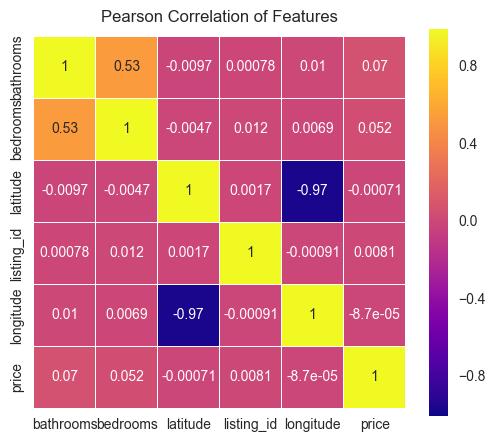

In [7]:
colormap = plt.cm.plasma
plt.figure(figsize=(6,5))
plt.title('Pearson Correlation of Features', y=1.02, size=12)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

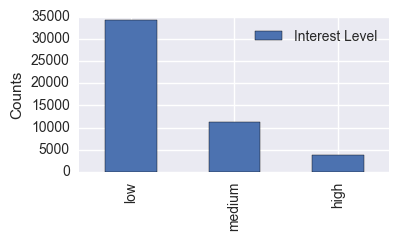

In [8]:
plt.figure(figsize=(4,2))
train["interest_level"].value_counts().plot(kind = 'bar', legend = True, label = 'Interest Level')
plt.ylabel('Counts')

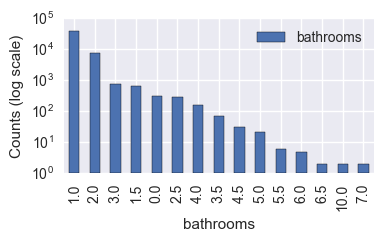

In [9]:
plt.figure(figsize=(4,2))
train['bathrooms'].value_counts()
train['bathrooms'].value_counts().plot(kind = 'bar', legend = True,log = True)
plt.ylabel('Counts (log scale)')
plt.xlabel('bathrooms')

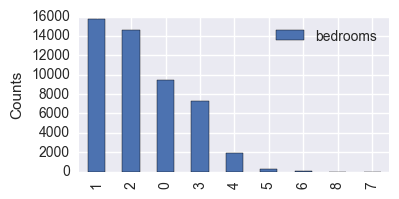

In [10]:
plt.figure(figsize=(4,2))
train['bedrooms'].value_counts().plot(kind = 'bar', legend = True)
plt.ylabel('Counts')

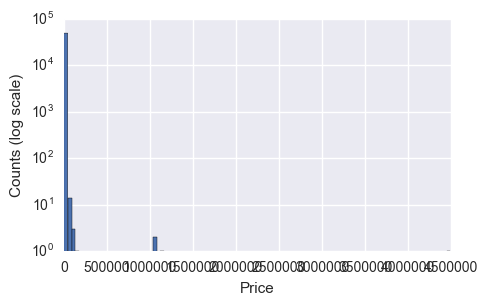

In [11]:
plt.figure(figsize=(5,3))
train['price'].hist(bins=100, log = True)
plt.xlabel('Price')
plt.ylabel("Counts (log scale)")

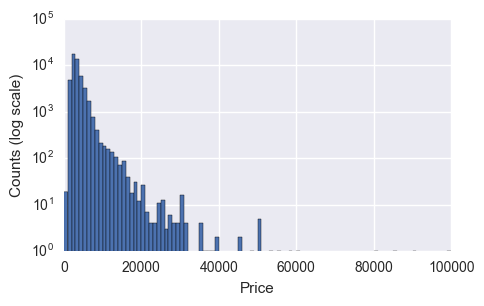

In [12]:
plt.figure(figsize=(5,3))
train['price'].hist(bins=100, range=(0,100000), log = True)
plt.xlabel('Price')
plt.ylabel("Counts (log scale)")

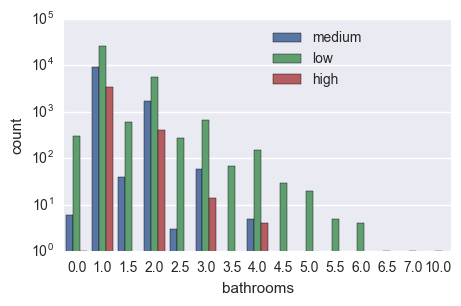

In [13]:
plt.figure(figsize=(5,3))
sns.countplot(x="bathrooms", hue="interest_level", log = True, data=train);
plt.legend(bbox_to_anchor=(0.8, 1.0))


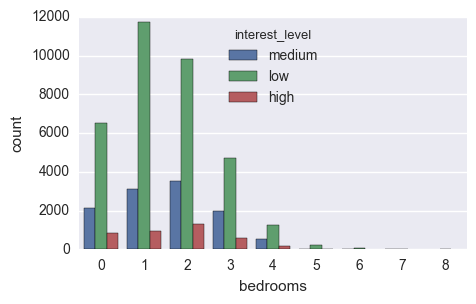

In [14]:
plt.figure(figsize=(5,3))
sns.countplot(x="bedrooms", hue="interest_level", data=train);

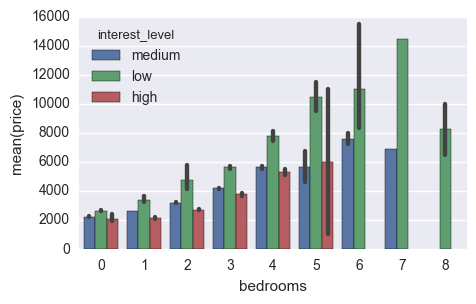

In [15]:
plt.figure(figsize=(5,3))
sns.barplot(x="bedrooms", y = "price", hue="interest_level", data=train);

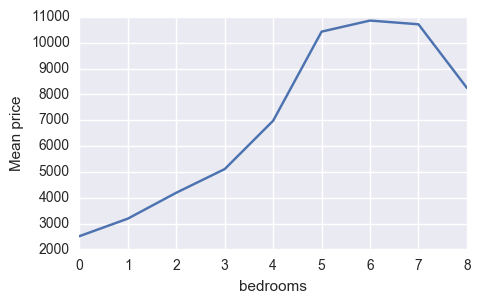

In [16]:
plt.figure(figsize=(5,3))
train.groupby('bedrooms')['price'].mean().plot()
plt.ylabel('Mean price')

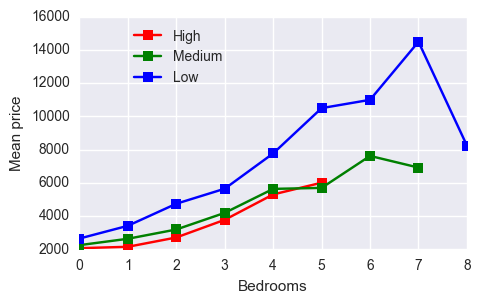

In [17]:
plt.figure(figsize=(5,3))
y1 = train.loc[train['interest_level'] == "high"].groupby('bedrooms')['price'].mean()
y2 = train.loc[train['interest_level'] == "medium"].groupby('bedrooms')['price'].mean()
y3 = train.loc[train['interest_level'] == "low"].groupby('bedrooms')['price'].mean()
plt.plot(y1,marker = 's', color = 'red', label = 'High')
plt.plot(y2,marker = 's',color = 'green', label = 'Medium')
plt.plot(y3,marker = 's',color = 'blue', label = 'Low')
plt.legend(bbox_to_anchor=(0.4, 1.0))
plt.ylabel('Mean price')
plt.xlabel('Bedrooms')

In [19]:
# look at the heat map of low interest level
train_low = train[(train.interest_level=="low")]
heat_map = folium.Map(location=[train['latitude'].mean(), train['longitude'].mean()], zoom_start=10)
heat_map.add_children(plugins.HeatMap([[row["latitude"], row["longitude"]] for name, row in train_low.iterrows()]))

In [20]:
# look at the heat map of low interest level
train_high = train[train.interest_level == "high"]
heat_map = folium.Map(location=[train['latitude'].mean(), train['longitude'].mean()], zoom_start=10)
heat_map.add_children(plugins.HeatMap([[row["latitude"], row["longitude"]] for name, row in train_high.iterrows()]))

## Feature engineering

In [21]:
train["num_photos"] = train["photos"].apply(len)
train["num_features"] = train["features"].apply(len)
train["num_description_words"] = train["description"].apply(lambda x: len(x.split(" ")))
train["created"] = pd.to_datetime(train["created"])
train["created_year"] = train["created"].dt.year
train["created_month"] = train["created"].dt.month
train["created_day"] = train["created"].dt.day

In [22]:
features_to_use = ["bathrooms", "bedrooms", "latitude", "longitude", "price",
             "num_photos", "num_features", "num_description_words",
             "created_year", "created_month", "created_day"]

In [23]:
from sklearn import preprocessing
categorical = ["display_address", "manager_id", "building_id", "street_address"]
for f in categorical:
      if train[f].dtype=='object':
            print(f)
            lbl = preprocessing.LabelEncoder()
            #fit both train and test together to include all unique values
            lbl.fit(list(train[f].values) + list(test[f].values))
            train[f] = lbl.transform(list(train[f].values))
            test[f] = lbl.transform(list(test[f].values))
            features_to_use.append(f)

display_address
manager_id
building_id
street_address


In [24]:
str(features_to_use)

"['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'num_photos', 'num_features', 'num_description_words', 'created_year', 'created_month', 'created_day', 'display_address', 'manager_id', 'building_id', 'street_address']"

In [25]:
train[features_to_use].head()

,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_description_words,created_year,created_month,created_day,display_address,manager_id,building_id,street_address
10,1.5,3,40.7145,-73.9425,3000,5,0,95,2016,6,24,12282,1568,3797,23484
10000,1.0,2,40.7947,-73.9667,5465,11,5,9,2016,6,12,9080,1988,8986,23680
100004,1.0,1,40.7388,-74.0018,2850,8,4,94,2016,4,17,13719,3733,8889,9827
100007,1.0,1,40.7539,-73.9677,3275,3,2,80,2016,4,18,10866,282,1848,14237
100013,1.0,4,40.8241,-73.9493,3350,3,1,68,2016,4,28,15072,2618,0,19227


In [91]:
#train.groupby(['manager_id', 'interest_level'])['manager_id'].count()
# number of unique managers
print ("Train: {0}".format(len(train.manager_id.unique())))
print ("Test: {0}".format(len(test.manager_id.unique())))


Train: 3481
Test: 3851


Further analysis of manage_id can be done - we could in principle build a feature for "skill_level" of manager based on what fraction of total apartment listings of particular manager are of interest level "low", "medium" or "high". For now, we can start with the above features